<a href="https://colab.research.google.com/github/kamalzada/Python-codes/blob/main/w10_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.concat(map(pd.read_csv, ['wiki_machine_learning.csv'])) 

In [ ]:
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib

In [ ]:
from fbprophet import Prophet

In [ ]:
df = data.copy()

In [ ]:
df.describe()

,"date ""count"" ""lang"" ""page"" ""rank"" ""month"" ""title"""
count,384
unique,384
top,"94 2015-02-21 1638 ""en"" ""Machine_learning"" ""87..."
freq,1


In [ ]:
len(df.columns)

1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 1 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   date "count" "lang" "page" "rank" "month" "title"  384 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [ ]:
df.values

array([['81 2015-01-01 1414 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['80 2015-01-02 1920 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['79 2015-01-03 1338 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['78 2015-01-04 1404 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['77 2015-01-05 2264 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['76 2015-01-06 2327 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['75 2015-01-07 2469 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['74 2015-01-08 2349 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['73 2015-01-09 2279 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['63 2015-01-10 1600 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['64 2015-01-11 1539 "en" "Machine_learning" "8708" "201501" "Machine_learning"'],
       ['6

In [ ]:
df[['in','date', 'count','lang' ,'mach','rank','m' ,'title']] = df['date "count" "lang" "page" "rank" "month" "title"'].str.split(" ", expand=True)

In [ ]:
df = df.drop(columns=['date "count" "lang" "page" "rank" "month" "title"', 'title', 'm', 'mach', 'lang'])

In [ ]:
df = df.drop(columns='in')

In [ ]:
df = df.drop(columns='rank')

In [ ]:
df[df['count']=='0'] # null value

,date,count
35,2015-02-05,0


In [ ]:
df['count']=df['count'].replace('0', np.nan)

In [ ]:
df['count'].isna().sum()

0

In [ ]:
df.dropna(subset=['count'], inplace=True)

In [ ]:
df['count'] = df['count'].astype('int') 

In [ ]:
df['date'] = pd.to_datetime(df['date']) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    383 non-null    datetime64[ns]
 1   count   383 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 KB


In [ ]:
df.rename(columns= {'date' : 'ds', 'count' : 'y'}, inplace=True)

In [ ]:
m = Prophet(interval_width=0.95, weekly_seasonality=True)

In [ ]:
model = m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30, freq='D')
forecast = m.predict(future) 

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
408,2016-02-15,2660.849908,2274.457502,3649.116781,2631.895969,2691.645278,302.088110,302.088110,302.088110,302.088110,302.088110,302.088110,0.0,0.0,0.0,2962.938018
409,2016-02-16,2662.475545,2462.135641,3928.236104,2631.661425,2694.559396,538.951785,538.951785,538.951785,538.951785,538.951785,538.951785,0.0,0.0,0.0,3201.427330
410,2016-02-17,2664.101182,2404.192403,3822.454730,2631.414650,2697.946968,429.901287,429.901287,429.901287,429.901287,429.901287,429.901287,0.0,0.0,0.0,3094.002469
411,2016-02-18,2665.726819,2279.498717,3691.354734,2631.394667,2701.395598,306.674206,306.674206,306.674206,306.674206,306.674206,306.674206,0.0,0.0,0.0,2972.401025
412,2016-02-19,2667.352456,1942.873273,3434.550154,2631.134083,2705.072060,-15.941153,-15.941153,-15.941153,-15.941153,-15.941153,-15.941153,0.0,0.0,0.0,2651.411303


In [ ]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2015-01-01,2473.583006
1,2015-01-02,2153.699466
2,2015-01-03,1322.063566
3,2015-01-04,1463.738887
4,2015-01-05,2479.924182
...,...,...
408,2016-02-15,2962.938018
409,2016-02-16,3201.427330
410,2016-02-17,3094.002469
411,2016-02-18,2972.401025


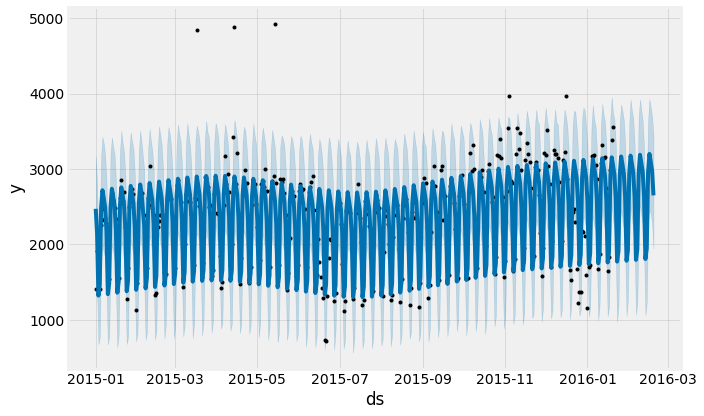

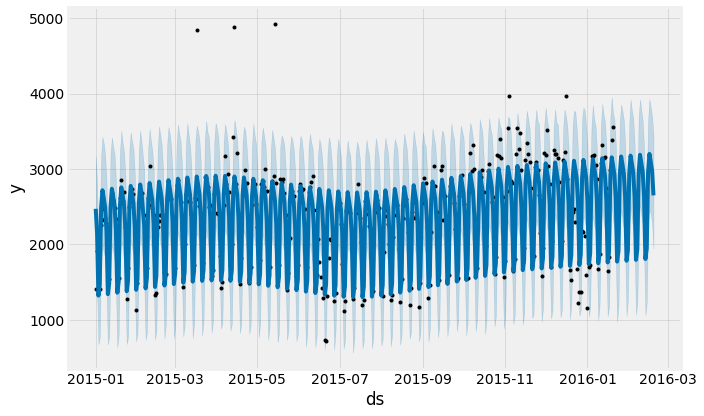

In [ ]:
m.plot(forecast)

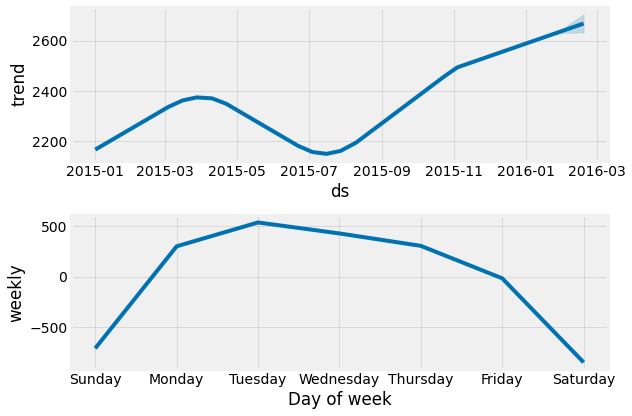

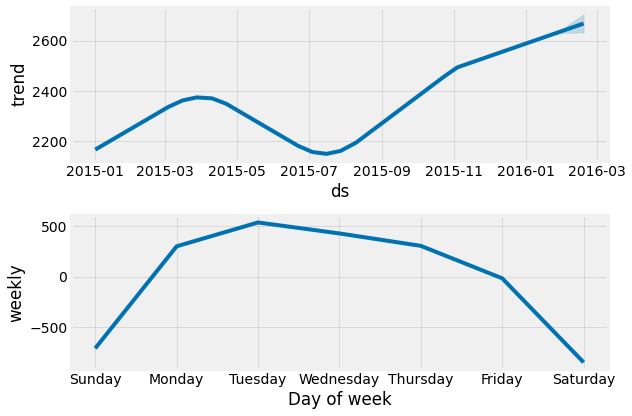

In [ ]:
m.plot_components(forecast)

In [ ]:
pip install neuralprophet

     |████████████████████████████████| 67 kB 2.8 MB/s 
     |████████████████████████████████| 155 kB 11.5 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
mod = NeuralProphet()

In [ ]:
model = mod.fit(df, freq='D')

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 229
INFO:NP.config:Auto-set epochs to 229


  0%|          | 0/229 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.31E-01, min: 5.97E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.31E-01, min: 5.97E+00


  0%|          | 0/229 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.31E-01, min: 5.46E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.31E-01, min: 5.46E+00


  0%|          | 0/229 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.20E-01, min: 4.98E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.20E-01, min: 4.98E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.27E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.27E-01
Epoch[229/229]: 100%|██████████| 229/229 [00:14<00:00, 15.96it/s, SmoothL1Loss=0.00908, MAE=213, RMSE=311, RegLoss=0]


In [ ]:
future = mod.make_future_dataframe(df, periods=30, n_historic_predictions=len(df)) 
forecast = mod.predict(future)

In [ ]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly
408,2016-02-15,None,2536.300293,NaN,2231.596924,304.703339
409,2016-02-16,None,2766.226074,NaN,2226.326660,539.899475
410,2016-02-17,None,2652.301270,NaN,2221.056152,431.245087
411,2016-02-18,None,2520.371094,NaN,2215.785645,304.585480
412,2016-02-19,None,2191.729492,NaN,2210.515137,-18.785809
